# Demo code to use Equinoctial Element for orbit propagation

In [9]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt

from src.utils import *
from src.propagation import *

## Propagation

In [10]:
## Parameters
mu = 3.986004414498200e14 # Central Body's gravitational constant (m^3/s^2)
Re = 6.378136460000000e6 # Central Body's equatorial radius (m)

In [ ]:
## Initial Condition
r0 = np.array([[3762519.374555595,7653889.605494166,4920134.758261914]]) # Initial position (m)
v0 = np.array([[1634.5155553226564,-2724.4575287820444,6196.075069155325]]) # Initial velocity (m/s)

equi0 = ijk2equinoctial(r0,v0,mu) # Transform initial state to initial Equinoctial elements

## Time interval to integrate
t = np.linspace(0, 315360.0, 315360+1) # time (s)

# Force in RSW coordinate (as a function of Equinoctial elements) - To be replaced with your model
F_RSW = lambda equi: np.array([0,0,0]) 

# Function to transform Force in RSW into time derivative of Equinoctial elements
#                     d (equi)/ dt = A(equi,mu) * F_RSW(equi) + b(equi,mu)
dequi_dt = lambda equi, t: (RSW2equi_A(equi,mu) @ F_RSW(equi) + RSW2equi_b(equi,mu)) 

# Feed the time derivative of Equinoctial elements (as a function of the Equinoctial elements) into the ODE solver
sol = odeint(dequi_dt, equi0[0], t, rtol=1e-10)

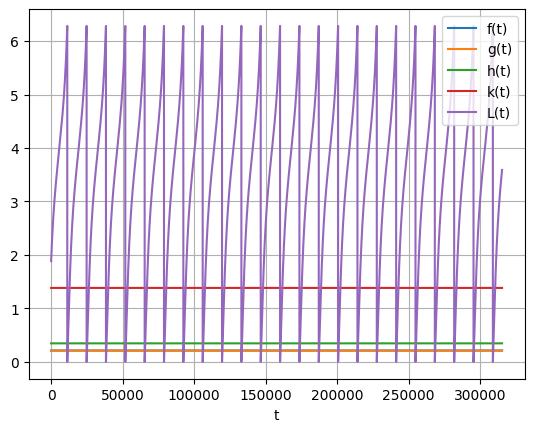

In [12]:
## Plot results
# plt.plot(t, sol[:, 0], label='p(t)')
plt.plot(t, sol[:, 1], label='f(t)')
plt.plot(t, sol[:, 2], label='g(t)')
plt.plot(t, sol[:, 3], label='h(t)')
plt.plot(t, sol[:, 4], label='k(t)')
plt.plot(t, np.mod(sol[:, 5], 2*np.pi), label='L(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

##  Comparison with the data
Don't forget to validate your model!

(Hint: Have you thought about splitting the dataset into training and validation sets?)

Importing data

In [13]:
import pandas as pd
# Load the CSV file with correct column extraction
# Assuming the first column is time, next three are position (r1, r2, r3), last three are velocity (v1, v2, v3)
df = pd.read_csv('./data/Challenge1.csv', header=0, usecols=[0,1,2,3,4,5,6], names=['time','r1', 'r2', 'r3', 'v1', 'v2', 'v3'])

# Extract position and velocity arrays
# Convert time strings to pandas datetime
t_raw = pd.to_datetime(df['time'])
# Calculate seconds relative to the first time point
t_data = (t_raw - t_raw.iloc[0]).dt.total_seconds().values # Time in seconds relative to first time point
r = df[['r1', 'r2', 'r3']].values
v = df[['v1', 'v2', 'v3']].values

equi_data = ijk2equinoctial(r,v,mu)

Plotting the propagation from learnt model and the data

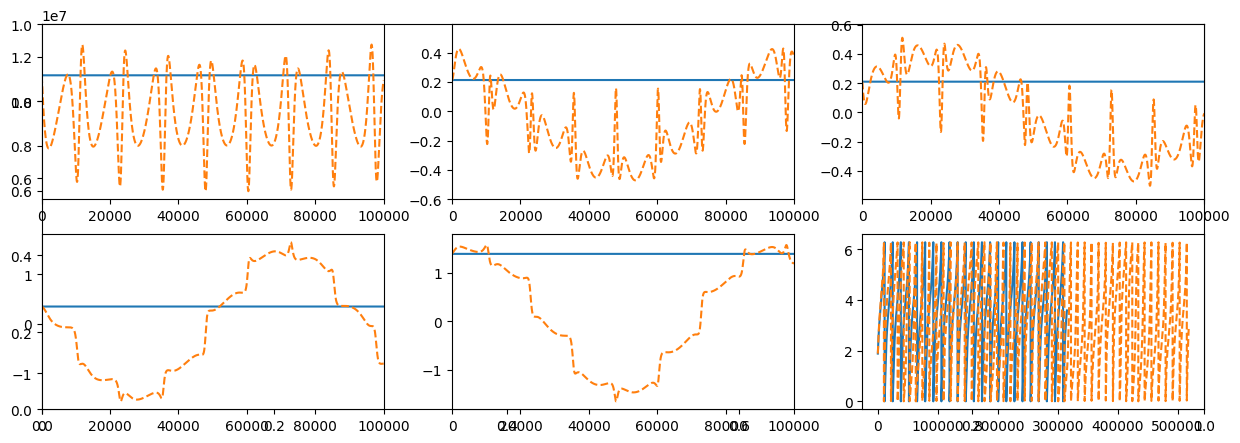

In [16]:
xmaxplt = 100000

plt.subplots(figsize=(15, 5))
plt.subplot(2, 3, 1)
plt.plot(t, sol[:, 0], label='p(t)')
plt.plot(t_data, equi_data[:, 0], label='p_data(t)', linestyle='dashed')
plt.xlim([0, xmaxplt])

plt.subplot(2, 3, 2)
plt.plot(t, sol[:, 1], label='f(t)')
plt.plot(t_data, equi_data[:, 1], label='f_data(t)', linestyle='dashed')
plt.xlim([0, xmaxplt])

plt.subplot(2, 3, 3)
plt.plot(t, sol[:, 2], label='g(t)')
plt.plot(t_data, equi_data[:, 2], label='g_data(t)', linestyle='dashed')
plt.xlim([0, xmaxplt])

plt.subplot(2, 3, 4)
plt.plot(t, sol[:, 3], label='h(t)')
plt.plot(t_data, equi_data[:, 3], label='h_data(t)', linestyle='dashed')
plt.xlim([0, xmaxplt])

plt.subplot(2, 3, 5)
plt.plot(t, sol[:, 4], label='k(t)')
plt.plot(t_data, equi_data[:, 4], label='k_data(t)', linestyle='dashed')
plt.xlim([0, xmaxplt])

plt.subplot(2, 3, 6)
plt.plot(t, np.mod(sol[:, 5],2*np.pi), label='l(t)')
plt.plot(t_data, equi_data[:, 5], label='l_data(t)', linestyle='dashed')


# Exporting for final submission

Submit your prediction of the trajectory in the following format:
- `t` : Time - Sampled per second, projection from 2017-01-07 00:00:00 to 2017-01-11 00:00:00
- `r` : Position in x,y,z coordinate, in meter
- `v` : Velocity in x,y,z coordinate, in meter per second

Save the file in `pickle` binaries and upload.

In [27]:
t = np.linspace(0, 345600.0, 345600+1) # time (s) - projection from 2017-01-07 00:00:00 to 2017-01-11 00:00:00, sampled per second
sol = odeint(dequi_dt, equi_data[-1], t, rtol=1e-10)

# Convert Equinoctial elements to Cartesian coordinates
r, v = equinoctial2ijk(sol, mu)

In [25]:
import pickle

with open('PredictedTrajectory.pkl', 'wb') as f:
    pickle.dump((t, r, v), f)